# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 1__

__Nombres de los estudiantes: María Arranz y Celia Rubio__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [1]:
import pandas as pd
filename = './cleveland.csv'
df = pd.read_csv(filename)
#eliminar los pacientes con datos incompletos
df = df.dropna(axis=0)
# indicar categóricas
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')
df['ca'] = df['ca'].astype('category')
#para distinguir a las dos clases de pacientes: enfermo y normal creamos un diccionario en el que a cada valor de target se le asigna su clase y lo mapeamos
dic_target = { 0 : 'normal', 1: 'enfermo', 2: 'enfermo', 3: 'enfermo', 4: 'enfermo'}
df['target'] = df['target'].map(dic_target)

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [2]:
df['target'].value_counts() # cuántos hay por cada valor

normal     160
enfermo    137
Name: target, dtype: int64

#### Las clases estan razonablemente equilibradas con un ratio 7:6 aproximadamente. Además el número de pesonas sanas es mayor que el número de personas enfermas, lo que se ajusta a la realidad.

In [3]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


#### La tabla muestra los rangos y distribuciones de las variables numéricas es decir, las no categóricas, observamos que el percentil 50% está entorno a la media de las variables, los datos están distribuidos de una forma bastante normal.

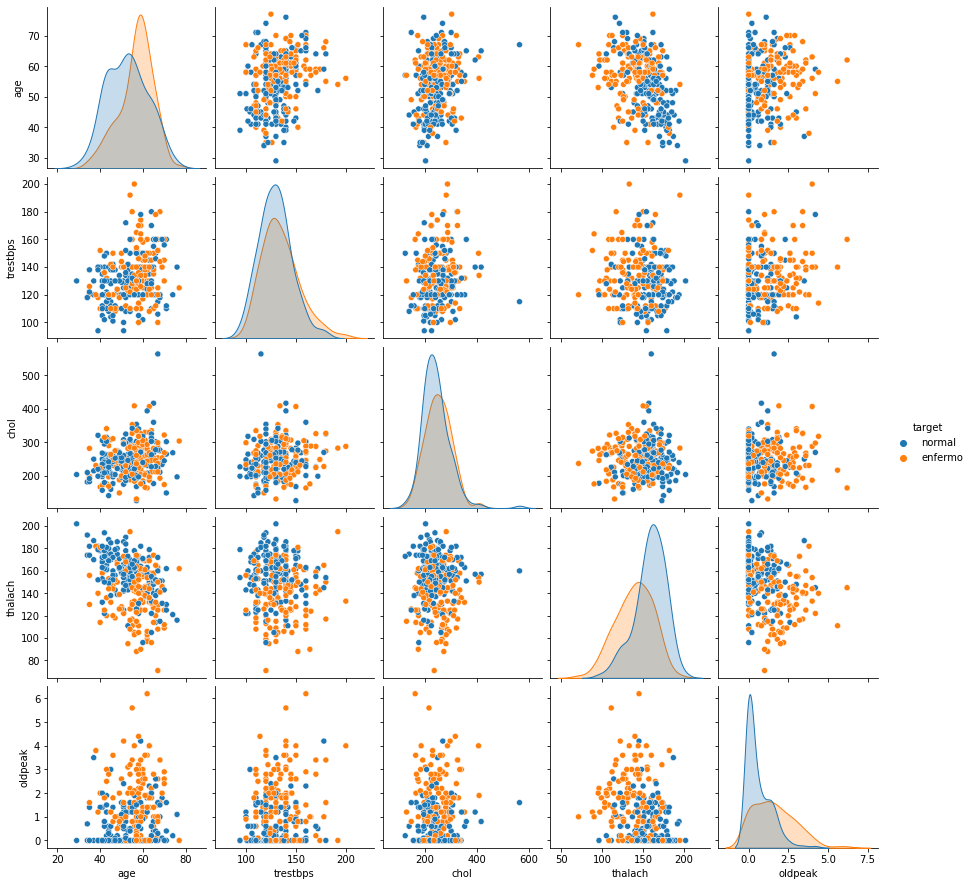

In [4]:
import seaborn as sns
variables = ['age','trestbps','chol','thalach','oldpeak','target'] # tomamos las variables de arriba
df2 = df.loc[:,variables]
sns.pairplot(df2, diag_kind='kde', hue='target')

#### No hay pares de variables numéricas que separen bien las clases

In [5]:
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.290476,0.202644,-0.394563,0.197123
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243
chol,0.202644,0.131536,1.000000,-0.000075,0.038596
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000


#### No hay una correlación clara entre las variables, la mayor correlación que se observa es entre la edad y la máxima frecuencia cardiaca obtenida (a más edad, menor frecuencia). Pero ninguna correlación entre variables es superior a 0.5, no hay datos extra en un principio.

#### Es un problema complejo de resolver ya que el diagnóstico de enfermedades no siempre es claro además que, habitualmente es esencial contar con un experto del dominio que pueda valorar el caso en su totalidad.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

#### Como vamos a emplear árboles de decisión no es necesario reescalar los datos.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [6]:

from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
RANDOM_STATE=83
train_accuracy = []
test_accuracy = []
#Datos_entrenamiento: array que contiene los datos de entrenamiento (sin la variable target) 
datos_entrenamiento = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
#Target: array que contiene la variable de salida
target = df['target'].values
# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(2, 11)
for md in max_depths: 
    #IMPORTANTE = utilizar entropía como criterio de selección de variables
    #Se decide continuar dividiendo un nodo si sigue habiendo elementos que separar: min_samples_split=2
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, datos_entrenamiento, target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9139569008888143,
  0.9502557437531444,
  0.970835429593605,
  0.9831796075800773,
  0.9932682095142267,
  0.9985060651797195],
 [0.7104597701149425,
  0.7906896551724139,
  0.7608045977011495,
  0.7571264367816093,
  0.7539080459770114,
  0.7709195402298851,
  0.764022988505747,
  0.7775862068965518,
  0.7639080459770116])

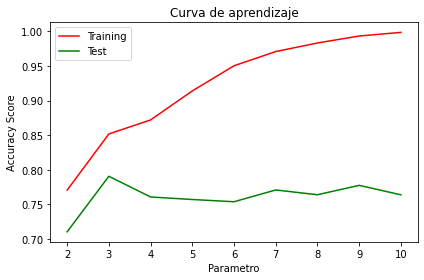

In [7]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

##### La profundidad óptima del árbol es 3 ya que maximiza la precisión sobre el conjunto de test

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

In [8]:
#Creamos el árbol con la profundidad que hemos encontrado óptima : 3
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(datos_entrenamiento, target)

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Pintamos el árbol
plt.figure(figsize=(200,200))
plot_tree(clf, filled=True, feature_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'], class_names=['normal','enfermo'], rounded=True)
plt.show()

- ¿Cuáles son las variables más importantes y en qué orden?
   
   La variable más importante es thal,  a continuación ca,  y en un nivel inferior age, cp, exang y restecg.
    
    
- ¿Hay variables del conjunto de datos que no se han usado?

    No se usan: sex, trestbps, chol, fbs, thalach, oldpeak, slope.    
   
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?
    
    Para calcularla construimos el arbol con tan solo una profundidad de 1 y obtenemos su tasa de aciertos para el conjunto de entrenamiento, así obtenemos que es 0.76 aproximadamente, con una pregunta ya discrimina mucho.


In [10]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_split=2, random_state=RANDOM_STATE)
clf2 = clf2.fit(datos_entrenamiento, target)
test_accuracy = clf2.score(datos_entrenamiento, target)
test_accuracy

0.7643097643097643

- ¿El árbol que hemos construido es capaz de separar las clases?

    No en su totalidad, ya que todos los nodos hoja salvo uno tienen entropía mayor que 0.

- ¿En cuál de los nodos hoja existe mayor confusión?

   En el nodo con mayor entropía, que tiene 0.918 y no separa bien a un tercio de los individuos.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [11]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, datos_entrenamiento, target, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


Nuestro clasificador ronda el 80% de todos los parámetros. Esto significa que no es perfecto, pero que funciona a grandes rasgos bastante bien.

In [12]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, datos_entrenamiento, target, cv=10)

# Informe por clases
cr = classification_report(target,predictions, target_names=['normal','enfermo'])
print(cr)



              precision    recall  f1-score   support

      normal       0.82      0.71      0.76       137
     enfermo       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

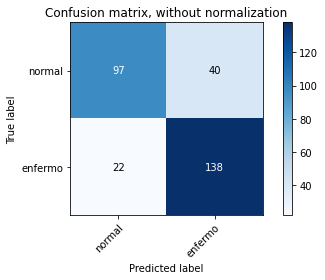

In [14]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(target, predictions, ['normal','enfermo'], normalize=False)

Arriba tenemos el informe detallado por cada clase y aquí la matriz de confusión. 

Para la clase normal, tiene un 0.82 de precisión y un 0.71 de recall, con un f1 de 0.76. En general, predice bastante "de más" que alguien está enfermo, pero tampoco identifica a todos los enfermos.

Para la clase enfermo, tiene un 0.78 de precisión y un 0.86 de recall, con un f1 de 0.82. Se corresponde con lo dicho anteriormente. El peor parámetro es el recall de normal, que implica que apunta muchos más enfermos de los que toca.

No nos parece muy fiable, aunque da una ligera idea de si puedes estar enfermo o no a grandes rasgos. No creemos que sea muy útil en situaciones reales porque no se podría usar ni para tranquilizar al paciente de que no lo tiene (pues hubo 22 individuos mal clasificados) ni aún peor, de que lo tiene, pues tiene muchos falsos positivos (40). Para una enfermedad donde se tuvieran pocas pruebas y se necesitara filtrar la urgencia quizás podría pasar como complemento de ayuda al doctor.

Usar árboles de decisión en este contexto tiene ventajas porque el resultado es fácilmente explicable, tanto para el entendimiento del doctor como para la explicación a los pacientes. Además, no requiere de procesamiento por cada nuevo caso más que pasar por el árbol, que tiene muy poco coste.

Sin embargo, en un contexto tan complicado como la medicina y con tantaas variables que afectan de maneras insospechadas, muchas veces un árbol no va a ser suficiente porque vamos a perder muchas dependencias sutiles entre las variables, y tener un árbol de poca profundidad va a ser muy poco útil por eso mismo.